In [51]:
import numpy as np
import torch
import torchvision
from torchvision.datasets import MNIST
print(torch.__version__)


2.6.0+cu124


In [2]:
from google.colab import files
uploaded = files.upload()  # This will allow you to select files from your local machine


Saving data.zip to data.zip


In [52]:
import zipfile
import os

# Specify the uploaded zip file's name
zip_filename = "data.zip"

# Create a directory to extract the files into
extracted_folder = "/content/extracted_data"  # You can change this path if needed

# Extract the zip file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print(f"Files extracted to {extracted_folder}")


Files extracted to /content/extracted_data


In [53]:
# List the files in the extracted folder
extracted_files = os.listdir(extracted_folder)
print(extracted_files)


['data']


# Image classification using MNSIT data set

In [7]:
# Download the dataset
# dataset = MNIST(root ='data/', download = True)

In [54]:
dataset = MNIST(root='extracted_data/data/', train=True, download=False)


In [55]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: extracted_data/data/
    Split: Train

In [7]:
len(dataset)   # there are 6000 images in the dataset, there is also a set of 10,000 images which can be created by passing the train = False to MNIST class

60000

In [8]:
test_dataset = MNIST(root ='extracted_data/data/', train = False)  # 10000 images for the test not for training
len(test_dataset)

10000

In [ ]:
# it is a supervsided,so every image in the training data has a labels

In [56]:
import matplotlib.pyplot as plt  # This imports the plotting library

# This magic command displays plots directly inside the Jupyter Notebook
%matplotlib inline

label 5


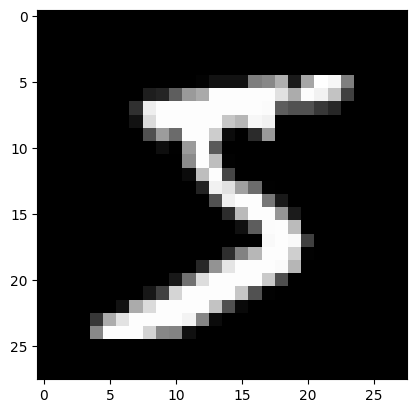

In [57]:
# please try to run this line if you are using google colab or other..... on classical notebook it will died/crash your kernel
image, label = dataset[0]
plt.imshow(image,cmap ='gray')
print('label', label)

lable 3


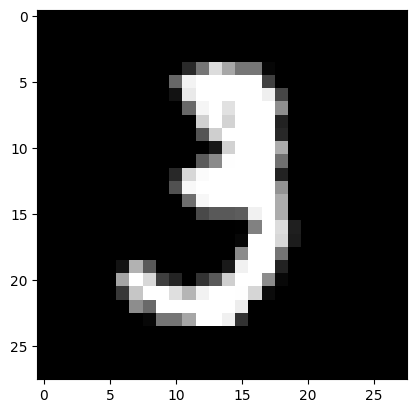

In [58]:
image, label = dataset[10]
plt.imshow(image,cmap = 'gray')
print('lable',label)

In [19]:
# so the thing is pytrch does not now how to work with images so we need to convert it into the tensors

In [59]:
import torchvision.transforms as transforms

In [60]:
dataset = MNIST(root='extracted_data/data/', train=True, transform= transforms.ToTensor())

In [61]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)    # the 1 in the output is mean the color (The image has 1 color channel (grayscale).)

torch.Size([1, 28, 28]) 5


In [62]:
# Print a 5x5 sub-region of the image from row 10 to 14 and column 10 to 14
# img_tensor is the tensor representing the image (shape: [1, 28, 28])
# We use slicing to extract a 5x5 part of the image starting from row 10 to 14 and column 10 to 14
print(img_tensor[:, 10:15, 10:15])

# Print the maximum and minimum pixel values in the entire image tensor
# torch.max() returns the maximum pixel value in the image tensor (for MNIST, usually 255)
# torch.min() returns the minimum pixel value in the image tensor (for MNIST, usually 0)
# the values near to 1 is basically white and 0 mean black
print(torch.max(img_tensor), torch.min(img_tensor))


tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


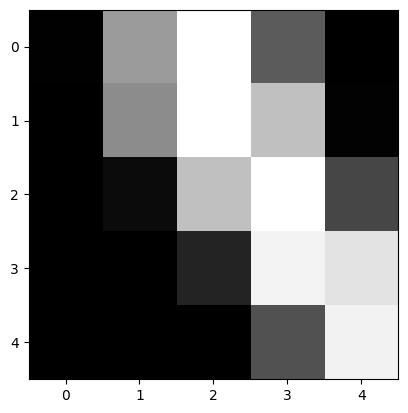

In [63]:
plt.imshow(img_tensor[0,10:15,10:15],cmap ='gray')

In [26]:
# Training and Validation Datasets

# 1. Training Set:
# The training set is the data used to train the machine learning model.
# It consists of labeled examples (inputs and outputs) that the model learns from.
# The goal is for the model to find patterns or relationships in this data so it can make accurate predictions on new data.

# Example: The model sees images of numbers (0-9) along with their labels during training and learns to classify them.

# 2. Validation Set:
# The validation set is a subset of the data that is used to evaluate the model during the training process.
# It helps in tuning the model's hyperparameters (like learning rate, number of epochs, etc.) and checking if the model is overfitting.
# It is separate from the training set and should not be used to train the model.

# Example: After training for a few epochs, the model is tested on the validation set to monitor its performance and adjust hyperparameters if necessary.

# 3. Test Set:
# The test set is a completely separate portion of the data that is used to evaluate the final performance of the model.
# This set is not used during training or validation and provides an unbiased estimate of how well the model performs on unseen data.
# The test set is used only after training and validation are complete.

# Example: After training and tuning the model using the training and validation sets, the model is tested on the test set to see how well it generalizes to new, real-world data.



In [64]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [65]:
from torch.utils.data import DataLoader

batch_size =128

train_loader = DataLoader(train_ds, batch_size, shuffle= True)
val_loader = DataLoader(val_ds,batch_size)


In [66]:
import torch.nn as nn

# The input size of the image is determined based on the shape of each image in the dataset.
# In the MNIST dataset, each image is a 28x28 pixel grayscale image, which gives 28 * 28 = 784 pixels in total.
# This is why we use 28*28 as the input size for the logistic regression model.

input_size = 28 * 28  # Each image has 28x28 pixels, flattened to a vector of length 784
num_classes = 10  # The MNIST dataset has 10 classes (digits 0 to 9)

# Creating a logistic regression model using a single fully connected layer
# The model will take a 784-dimensional input (flattened 28x28 image) and output 10 values (for each digit class)
model = nn.Linear(input_size, num_classes)  # Linear layer with input size and output size (number of classes)


In [19]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0150,  0.0024, -0.0251,  ...,  0.0026,  0.0172, -0.0330],
        [ 0.0272, -0.0354, -0.0257,  ..., -0.0056, -0.0049,  0.0010],
        [-0.0124, -0.0147,  0.0113,  ...,  0.0299,  0.0246, -0.0165],
        ...,
        [ 0.0137, -0.0258, -0.0123,  ..., -0.0314,  0.0080,  0.0013],
        [ 0.0345, -0.0057,  0.0290,  ...,  0.0225, -0.0121, -0.0267],
        [ 0.0018, -0.0143, -0.0195,  ...,  0.0299, -0.0015, -0.0168]],
       requires_grad=True)

In [20]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0215,  0.0277,  0.0026,  0.0192, -0.0295,  0.0037,  0.0120, -0.0104,
        -0.0234, -0.0291], requires_grad=True)

In [67]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Define a fully connected (linear) layer to map input_size to num_classes
        self.Linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        # Reshape the input 'x' to a 2D tensor where the second dimension is 784 (28x28 pixels flattened)
        xb = x.reshape(-1, 784)  # '-1' means batch size, 784 is the flattened size of 28x28 images

        # Pass the reshaped input through the linear layer
        out = self.Linear(xb)

        return out

# Instantiate the model
model = MnistModel()


In [68]:
for images, label in train_loader:
  print('images.shape:', images.shape)
  outputs = model(images)
  break

print('output.shape:', outputs.shape)
print('sample outputs:\n', outputs[:2].data)

images.shape: torch.Size([128, 1, 28, 28])
output.shape: torch.Size([128, 10])
sample outputs:
 tensor([[-0.2232,  0.0205,  0.0342,  0.0260,  0.0852, -0.0645, -0.0178,  0.0042,
          0.0554,  0.1260],
        [-0.1917, -0.3181, -0.1082,  0.1873,  0.4737,  0.2387, -0.1010,  0.1796,
          0.1972, -0.0843]])


In [69]:
import torch.nn.functional as F


In [70]:
# apply softmax for each output row
probs = F.softmax(outputs, dim = 1)

#look at sample probabilities
print("sample probabilities:\n", probs[:2].data)

#adding up the probabaities of an output row

print("sum:", torch.sum(probs[0]).item())


sample probabilities:
 tensor([[0.0793, 0.1012, 0.1026, 0.1018, 0.1080, 0.0930, 0.0974, 0.0996, 0.1048,
         0.1125],
        [0.0767, 0.0676, 0.0833, 0.1120, 0.1491, 0.1179, 0.0839, 0.1111, 0.1131,
         0.0853]])
sum: 1.0


In [71]:
max_probs,  preds = torch.max(probs, dim =1)
print(preds)

print(max_probs)

tensor([9, 4, 4, 4, 4, 4, 4, 9, 4, 9, 5, 4, 4, 4, 5, 8, 4, 3, 4, 3, 6, 3, 3, 8,
        4, 9, 3, 4, 9, 4, 9, 4, 4, 9, 2, 6, 5, 7, 4, 4, 9, 5, 3, 3, 4, 3, 2, 4,
        4, 4, 9, 5, 1, 4, 4, 2, 8, 4, 2, 6, 4, 9, 4, 3, 4, 4, 8, 3, 4, 4, 4, 4,
        3, 4, 2, 8, 4, 4, 3, 4, 9, 4, 4, 4, 4, 4, 8, 2, 9, 4, 9, 5, 4, 9, 3, 4,
        4, 4, 9, 5, 8, 8, 9, 3, 5, 4, 4, 3, 9, 4, 3, 4, 5, 9, 3, 4, 3, 4, 5, 4,
        2, 9, 2, 2, 5, 9, 3, 7])
tensor([0.1125, 0.1491, 0.1330, 0.1733, 0.1265, 0.1437, 0.1397, 0.1211, 0.1413,
        0.1273, 0.1243, 0.1325, 0.1507, 0.1362, 0.1395, 0.1432, 0.1401, 0.1152,
        0.1230, 0.1338, 0.1310, 0.1345, 0.1439, 0.1413, 0.1302, 0.1198, 0.1181,
        0.1257, 0.1276, 0.1332, 0.1299, 0.1247, 0.1232, 0.1303, 0.1144, 0.1282,
        0.1213, 0.1305, 0.1259, 0.1382, 0.1152, 0.1185, 0.1371, 0.1436, 0.1706,
        0.1308, 0.1269, 0.1369, 0.1344, 0.1304, 0.1219, 0.1181, 0.1173, 0.1612,
        0.1611, 0.1328, 0.1241, 0.1473, 0.1316, 0.1166, 0.1321, 0.1596, 0.1473,
       

In [72]:
# Evaluation Metric and loss function

def accuracy(outputs, labels):
  _, preds = torch.max(outputs,dim = 1)
  return torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [73]:
accuracy(outputs, label)

tensor(0.1406)

In [74]:
loss_fn = F.cross_entropy

In [75]:
# loss for current batch of data

loss = loss_fn(outputs,label)
print(loss)

tensor(2.3072, grad_fn=<NllLossBackward0>)


**Training Model**

In [77]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size,num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images ,labels = batch
    out = self(images)  #generate predication
    loss = F.cross_entropy(out,labels)  # calculate loss

    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)  #generate predication
    loss = F.cross_entropy(out,labels)  # calculate loss
    acc = accuracy(out,labels)
    return {'val_loss': loss, 'val_acc':acc}


  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   #combine losses
    batch_accs= [x['val_acc']for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}

  def epoch_end(self,epoch,result):
    print("Epoch[{}], val_loss: {:.4f}, val_acc:{:.4f}".format(epoch, result['val_loss'],result['val_acc']))


model = MnistModel()

In [78]:
def evaluate(model, val_loder):
  outputs =[model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    #traininng phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      #validation phase
      result = evaluate(model, val_loader)
      model.epoch_end(epoch, result)
      history.append(result)

    return history



In [79]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.309373378753662, 'val_acc': 0.09909018874168396}

In [80]:
history1 = fit(15, 0.001, model, train_loader,  val_loader)

Epoch[0], val_loss: 2.3084, val_acc:0.1009
Epoch[0], val_loss: 2.3072, val_acc:0.1019
Epoch[0], val_loss: 2.3060, val_acc:0.1037
Epoch[0], val_loss: 2.3049, val_acc:0.1049
Epoch[0], val_loss: 2.3038, val_acc:0.1057
Epoch[0], val_loss: 2.3027, val_acc:0.1070
Epoch[0], val_loss: 2.3016, val_acc:0.1080
Epoch[0], val_loss: 2.3004, val_acc:0.1095
Epoch[0], val_loss: 2.2993, val_acc:0.1101
Epoch[0], val_loss: 2.2983, val_acc:0.1114
Epoch[0], val_loss: 2.2973, val_acc:0.1123
Epoch[0], val_loss: 2.2962, val_acc:0.1135
Epoch[0], val_loss: 2.2951, val_acc:0.1151
Epoch[0], val_loss: 2.2940, val_acc:0.1160
Epoch[0], val_loss: 2.2929, val_acc:0.1175
Epoch[0], val_loss: 2.2919, val_acc:0.1186
Epoch[0], val_loss: 2.2908, val_acc:0.1193
Epoch[0], val_loss: 2.2896, val_acc:0.1198
Epoch[0], val_loss: 2.2885, val_acc:0.1207
Epoch[0], val_loss: 2.2874, val_acc:0.1224
Epoch[0], val_loss: 2.2863, val_acc:0.1239
Epoch[0], val_loss: 2.2849, val_acc:0.1244
Epoch[0], val_loss: 2.2837, val_acc:0.1271
Epoch[0], v

Text(0.5, 1.0, 'Accuracy vs.NO.of epochs')

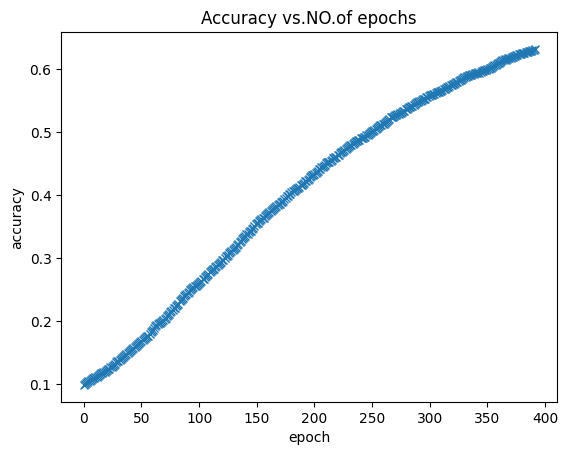

In [81]:
# replace these values with your results

history = [result0]+history1
accuracies = [result['val_acc']for result in history]

plt.plot(accuracies, 'x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs.NO.of epochs')

In [85]:

# Define test dataset
test_dataset = MNIST(root='extracted_data/data/', train=False, transform=transforms.ToTensor())


Shape: torch.Size([1, 28, 28])
Label 7


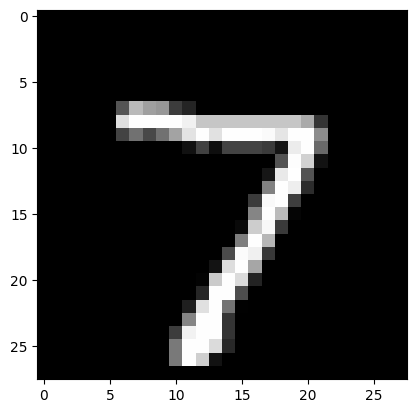

In [86]:
img,label  =test_dataset[0]

plt.imshow(img[0], cmap = 'gray')

print('Shape:', img.shape)
print('Label', label)

In [87]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [88]:
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim = 1)
  return preds[0].item()

Label: 7 , Predicated: 7


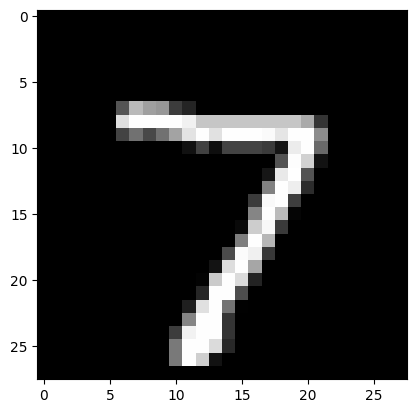

In [89]:
img, label  =test_dataset[0]
plt.imshow(img[0], cmap =('gray'))
print('Label:', label, ', Predicated:', predict_image(img, model))


Label: 5 ,  Predicated: 6


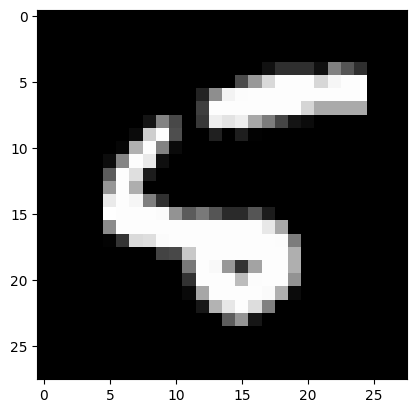

In [95]:
img, label  =test_dataset[8]
plt.imshow(img[0], cmap =('gray'))
print('Label:', label, ',  Predicated:', predict_image(img, model))


Label: 4 , Predicated: 9


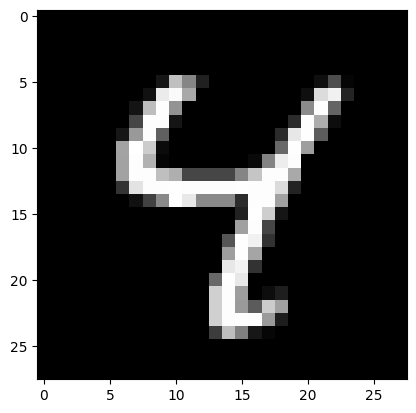

In [94]:
img, label  =test_dataset[6]
plt.imshow(img[0], cmap =('gray'))
print('Label:', label, ', Predicated:', predict_image(img, model))
